In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)


In [30]:
classes = ['airplane', 'automobile', 'birds', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

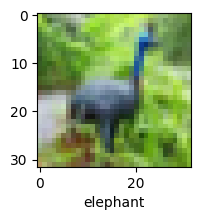

In [29]:
plot_sample(x_train, y_train, 6)

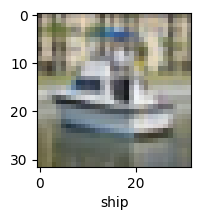

In [12]:
plot_sample(x_train, y_train, 501)

In [13]:
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 173s 110ms/step - loss: 1.8143 - accuracy: 0.3535
Epoch 2/3
1563/1563 [==============================] - 169s 108ms/step - loss: 1.6240 - accuracy: 0.4260
Epoch 3/3
1563/1563 [==============================] - 161s 103ms/step - loss: 1.5388 - accuracy: 0.4599


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.43      0.62      0.51      1000
           1       0.67      0.40      0.50      1000
           2       0.29      0.52      0.37      1000
           3       0.30      0.46      0.36      1000
           4       0.62      0.12      0.20      1000
           5       0.44      0.27      0.34      1000
           6       0.57      0.37      0.45      1000
           7       0.40      0.66      0.50      1000
           8       0.79      0.23      0.36      1000
           9       0.48      0.61      0.54      1000

    accuracy                           0.43     10000
   macro avg       0.50      0.43      0.41     10000
weighted avg       0.50      0.43      0.41     10000



In [17]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

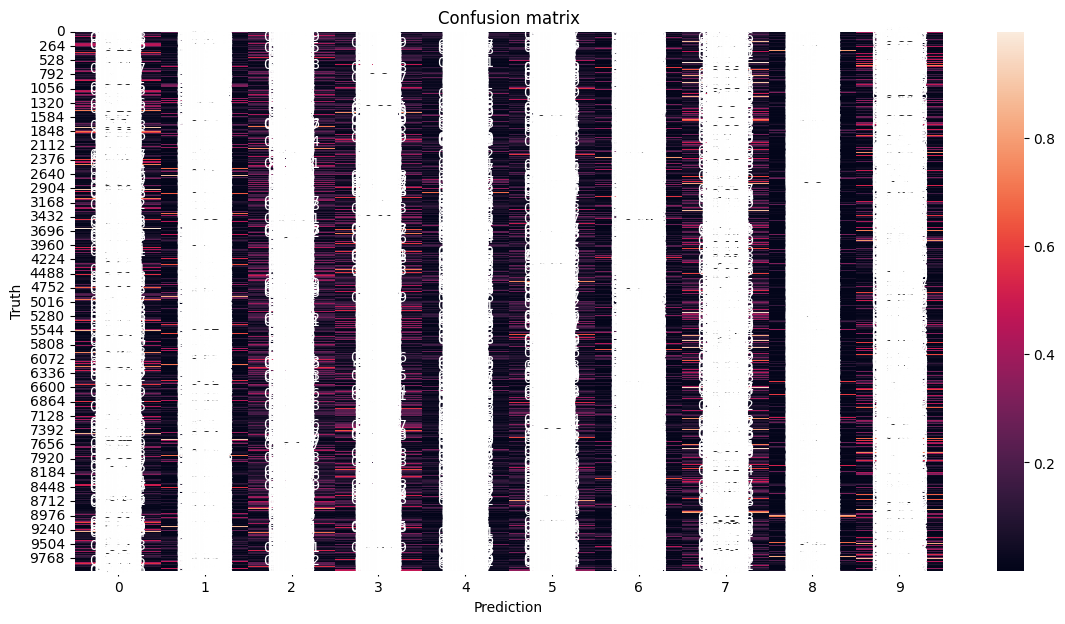

In [18]:
plt.figure(figsize =(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 92s 56ms/step - loss: 1.4177 - accuracy: 0.4892
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0752 - accuracy: 0.6236
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9431 - accuracy: 0.6719
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8516 - accuracy: 0.7045
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7805 - accuracy: 0.7295
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7165 - accuracy: 0.7513
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6697 - accuracy: 0.7661
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6201 - accuracy: 0.7832
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5734 - accuracy: 0.7998
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [21]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 2.3056 - accuracy: 0.1376


[2.3055622577667236, 0.13760000467300415]

In [22]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[0.09539339, 0.09770546, 0.10177864, 0.10526548, 0.10489693,
        0.08026005, 0.09820028, 0.10192675, 0.10403701, 0.11053595],
       [0.10337359, 0.09565064, 0.09972785, 0.10556799, 0.10895555,
        0.07278913, 0.09840468, 0.09974339, 0.11059126, 0.10519585],
       [0.10007221, 0.09730154, 0.10370896, 0.10508382, 0.11098633,
        0.0765008 , 0.09826647, 0.09875099, 0.10863634, 0.10069246],
       [0.09669235, 0.09493371, 0.10229441, 0.10392341, 0.10575427,
        0.07214759, 0.10094321, 0.09990363, 0.1156131 , 0.10779428],
       [0.10458261, 0.09246995, 0.10269477, 0.10472019, 0.11035372,
        0.08054021, 0.10537001, 0.0972148 , 0.09886958, 0.10318407]],
      dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 8, 4, 8, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

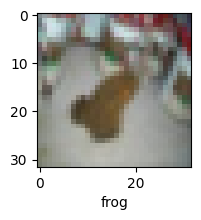

In [26]:
plot_sample(x_test, y_test, 59)

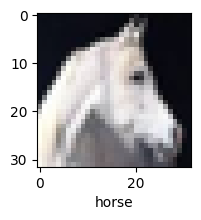

In [27]:
plot_sample(x_test, y_test, 109)

In [ ]:
classes[y_classes[60]]

'horse'